In [27]:
# import pandas and load taxi data parquet file
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

taxiDataDf = pd.read_parquet('./yellow_tripdata_2022-01.parquet');
print("parquest file data loaded");

parquest file data loaded


In [29]:
# display top 5 rows of the parquet file
print(taxiDataDf.head(5));

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2022-01-01 00:35:40   2022-01-01 00:53:29              2.0   
1         1  2022-01-01 00:33:43   2022-01-01 00:42:07              1.0   
2         2  2022-01-01 00:53:21   2022-01-01 01:02:19              1.0   
3         2  2022-01-01 00:25:21   2022-01-01 00:35:23              1.0   
4         2  2022-01-01 00:36:48   2022-01-01 01:14:20              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.80         1.0                  N           142           236   
1           2.10         1.0                  N           236            42   
2           0.97         1.0                  N           166           166   
3           1.09         1.0                  N           114            68   
4           4.30         1.0                  N            68           163   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \


In [31]:
# shape of dataset
# rows and columns
print(taxiDataDf.shape)

(2463931, 19)


In [69]:
# check for missing values
columnsList = taxiDataDf.columns[taxiDataDf.isnull().any()].tolist()  # display columns which has null values
print(columnsList);

passengerNulls = taxiDataDf['passenger_count'].isnull().sum()
RatecodeIDNulls = taxiDataDf['RatecodeID'].isnull().sum()
store_and_fwd_flagNulls = taxiDataDf['store_and_fwd_flag'].isnull().sum()
congestion_surchargeNulls = taxiDataDf['congestion_surcharge'].isnull().sum()
airport_feeNulls = taxiDataDf['airport_fee'].isnull().sum()

print('passenger null count : ' ,passengerNulls);
print('RatecodeID null count: ', RatecodeIDNulls);
print('store_and_fwd_flag null count :', store_and_fwd_flagNulls);
print('congestion_surcharge null count : ',congestion_surchargeNulls);
print('airport_fee null count:' , airport_feeNulls);

['passenger_count', 'RatecodeID', 'store_and_fwd_flag', 'congestion_surcharge', 'airport_fee']
passenger null count :  71503
RatecodeID null count:  71503
store_and_fwd_flag null count : 71503
congestion_surcharge null count :  71503
airport_fee null count: 71503


In [49]:
# summary of stats
print(taxiDataDf.describe())

           VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  2.463931e+06                     2463931                     2463931   
mean   1.707819e+00  2022-01-17 01:19:51.689724  2022-01-17 01:34:04.421902   
min    1.000000e+00         2008-12-31 22:23:09         2008-12-31 23:06:56   
25%    1.000000e+00         2022-01-09 15:37:41  2022-01-09 15:50:50.500000   
50%    2.000000e+00         2022-01-17 12:11:45         2022-01-17 12:23:49   
75%    2.000000e+00  2022-01-24 13:49:37.500000         2022-01-24 14:02:51   
max    6.000000e+00         2022-05-18 20:41:57         2022-05-18 20:47:45   
std    5.021375e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     2.392428e+06   2.463931e+06  2.392428e+06  2.463931e+06   
mean      1.389453e+00   5.372751e+00  1.415507e+00  1.660768e+02   
min       0.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.

In [75]:
# drop any rows with missing values
taxiDataIgnoreNadf = taxiDataDf.dropna(how='any') # this is the difference between shape output and isNull sum output
print(taxiDataIgnoreNadf.shape)

(2392428, 19)


In [238]:

print(taxiDataIgnoreNadf.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'trip_duration',
       'duration'],
      dtype='object')


In [240]:
print(taxiDataIgnoreNadf['tpep_pickup_datetime'].dtype)
print(taxiDataIgnoreNadf['tpep_dropoff_datetime'].dtype)

datetime64[us]
datetime64[us]


In [ ]:
# difference between two date time columns
# astype(int) converts a datetime value into seconds into unix epoch
print(taxiDataIgnoreNadf['tpep_pickup_datetime'].astype(int)) 
print(taxiDataIgnoreNadf['tpep_dropoff_datetime'].astype(int))

In [286]:
taxiDataIgnoreNadf.drop(columns=['trip_duration'])
#  create a new column
# subtraction of two datetime objects results in timedelta

duration = taxiDataIgnoreNadf['tpep_dropoff_datetime'] - taxiDataIgnoreNadf['tpep_pickup_datetime']

# convert timedelta to minutes, divide each item by 60 after converting each to their respective total seconds
taxiDataIgnoreNadf.loc[:,'duration'] = duration.dt.total_seconds().div(60)

print (taxiDataIgnoreNadf.head(5))


   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2022-01-01 00:35:40   2022-01-01 00:53:29              2.0   
1         1  2022-01-01 00:33:43   2022-01-01 00:42:07              1.0   
2         2  2022-01-01 00:53:21   2022-01-01 01:02:19              1.0   
3         2  2022-01-01 00:25:21   2022-01-01 00:35:23              1.0   
4         2  2022-01-01 00:36:48   2022-01-01 01:14:20              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.80         1.0                  N           142           236   
1           2.10         1.0                  N           236            42   
2           0.97         1.0                  N           166           166   
3           1.09         1.0                  N           114            68   
4           4.30         1.0                  N            68           163   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0       

In [306]:
# get day of week from the datetime object
# df.dt.dayofweek == gives value from 0 to 6 viz monday to sunday
taxiDataIgnoreNadf.loc[:,'day_of_week'] = taxiDataIgnoreNadf['tpep_pickup_datetime'].dt.dayofweek

# df.dt.hour gives value from 0 to 23 viz hour of the day
taxiDataIgnoreNadf.loc[:,'pickup_hour'] = taxiDataIgnoreNadf['tpep_pickup_datetime'].dt.hour

print(taxiDataIgnoreNadf.head())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2022-01-01 00:35:40   2022-01-01 00:53:29              2.0   
1         1  2022-01-01 00:33:43   2022-01-01 00:42:07              1.0   
2         2  2022-01-01 00:53:21   2022-01-01 01:02:19              1.0   
3         2  2022-01-01 00:25:21   2022-01-01 00:35:23              1.0   
4         2  2022-01-01 00:36:48   2022-01-01 01:14:20              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.80         1.0                  N           142           236   
1           2.10         1.0                  N           236            42   
2           0.97         1.0                  N           166           166   
3           1.09         1.0                  N           114            68   
4           4.30         1.0                  N            68           163   

   payment_type  ...  tip_amount  tolls_amount  improvement_surcharge  \
0

<Axes: xlabel='pickup_hour', ylabel='count'>

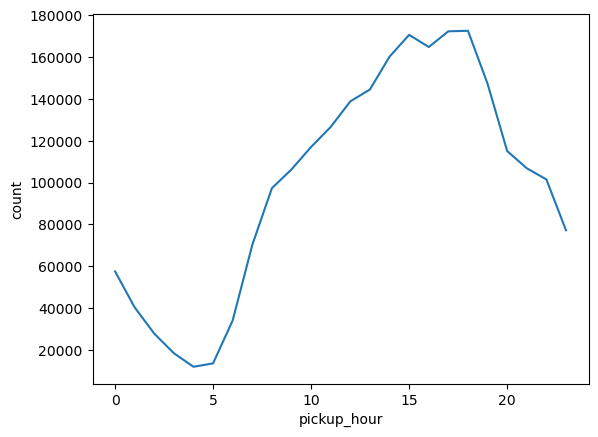

In [314]:
#  line plot using sea born; number of trips by pickup hour
import seaborn as sns

pickSByHour = taxiDataIgnoreNadf['pickup_hour'].value_counts()
#  here we are plotting count of trips vs pickup_hour
# load dataset 
sns.lineplot(data=pickSByHour) 

<Axes: xlabel='day_of_week', ylabel='count'>

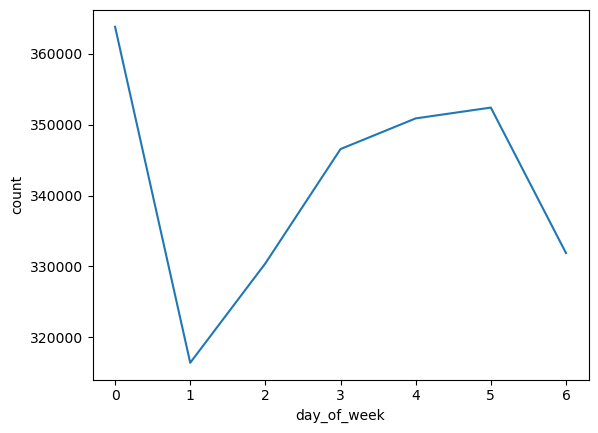

In [320]:
#  line plot using sea born; number of trips by pickup day
import seaborn as sns

picksByDay = taxiDataIgnoreNadf['day_of_week'].value_counts()

sns.lineplot(data=picksByDay)

In [ ]:
# extract date from the series
import pandas as pd
print (pd.__version__)

In [322]:
print(taxiDataIgnoreNadf.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'trip_duration',
       'duration', 'day_of_week', 'pickup_hour', 'pickSByHour'],
      dtype='object')


In [346]:
# create a new data frame for selected columns
import pandas as pd
newDataFrame = taxiDataIgnoreNadf[['trip_distance','duration','fare_amount','tip_amount', 'total_amount',]]

corrsMatrix = newDataFrame.corr()

print(corrsMatrix)

# looking at the below corrs matrix
# it looks like tip_amount and trip_distance are well correlated, highest correlation occurs between total_amount and fare_amount

               trip_distance  duration  fare_amount  tip_amount  total_amount
trip_distance       1.000000  0.165854     0.039426    0.491978      0.048724
duration            0.165854  1.000000     0.008134    0.086206      0.009720
fare_amount         0.039426  0.008134     1.000000    0.024196      0.999878
tip_amount          0.491978  0.086206     0.024196    1.000000      0.038133
total_amount        0.048724  0.009720     0.999878    0.038133      1.000000


<Axes: >

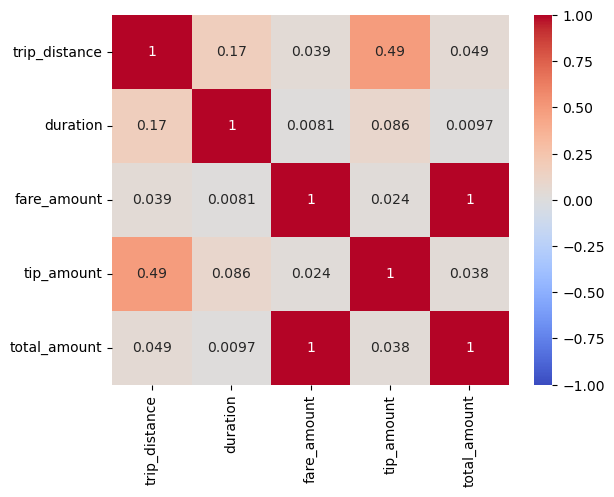

In [348]:
#  plot heatmap using seaborn for the above corrs matrix
import seaborn as sns
# annot in the below shows values in the map
sns.heatmap(corrsMatrix,annot=True, cmap='coolwarm', vmin=-1, vmax=1)

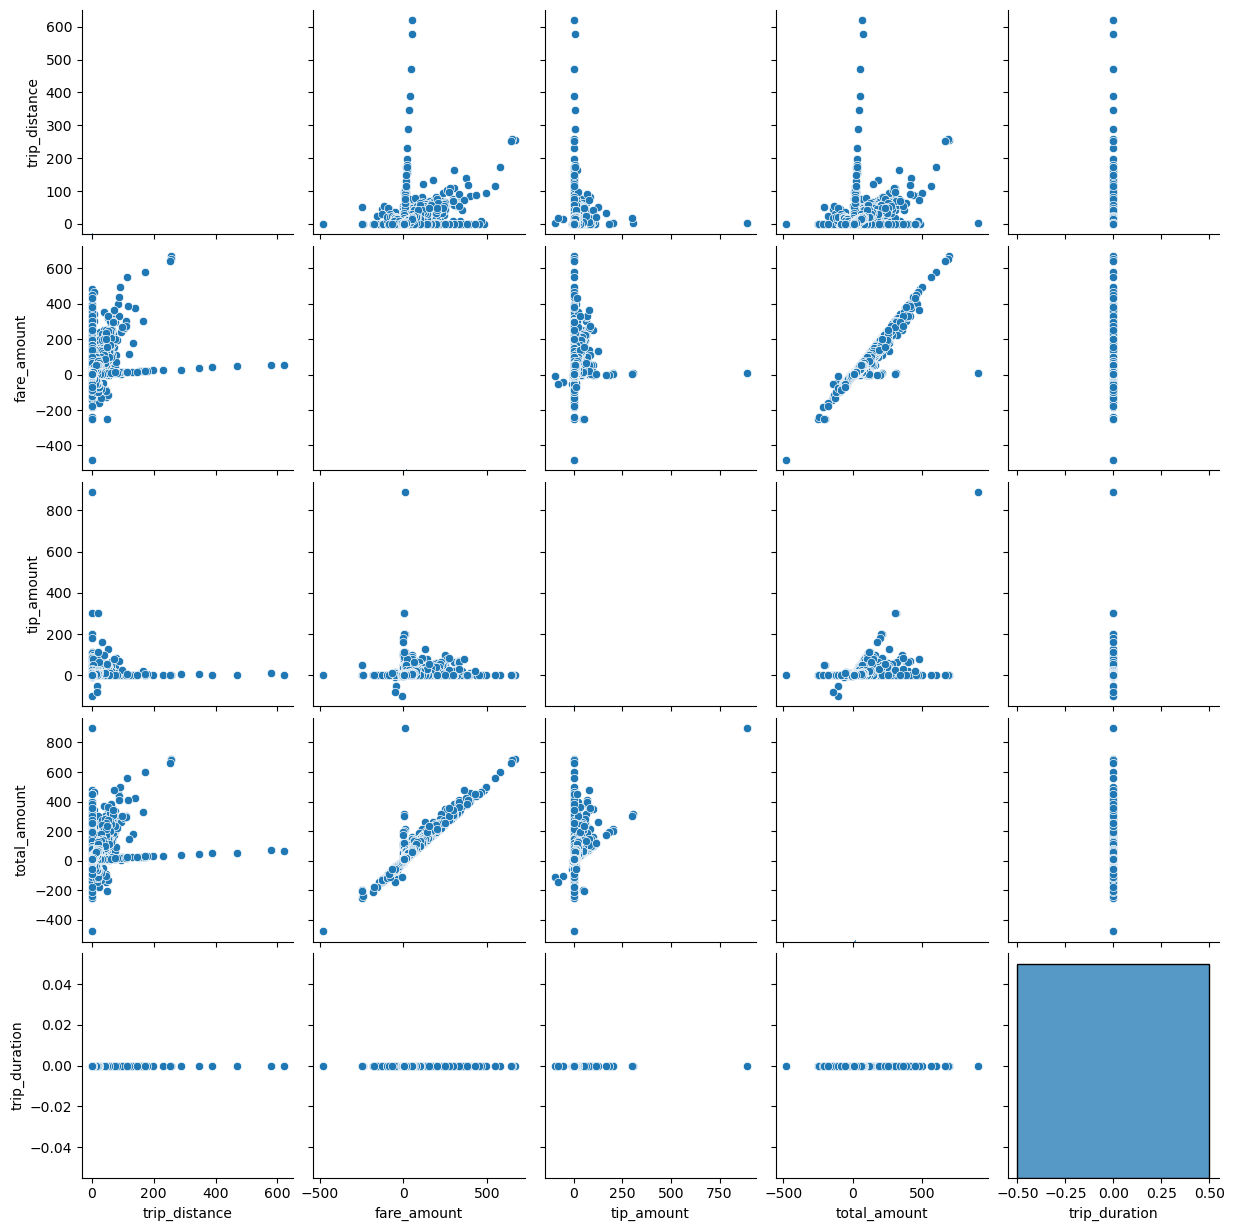

In [356]:
# scatter plot of numercial variables
# Pairplots, also known as scatterplot matrices, allow for the visualization of pairwise relationships between multiple variables simultaneously. 
# Each subplot in the pairplot represents the scatterplot of one variable against another.

sampleframe = taxiDataIgnoreNadf[['trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'trip_duration']].sample(frac=0.5,random_state=1)

sns.pairplot(sampleframe)

[237, 236, 132, 161, 186, 142, 141, 48, 170, 162, 239, 230, 163, 234, 79]


<Axes: xlabel='PULocationID', ylabel='count'>

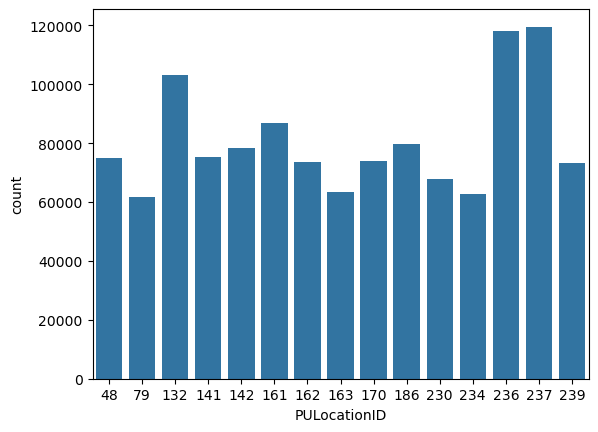

In [428]:
# countplot
# A count plot is a type of categorical plot that displays the number of occurrences of each category in a dataset

import seaborn as sns
# below is to find top 15 categories within a column and then convert the series into a dataframe. to_frame converts series to frame
# taxiDataIgnoreNadf['PULocationID'].value_counts().nlargest(15).to_frame()

# Find top 15 most frequent values in 'PULocationID' column
top15_pulocationCategories = taxiDataIgnoreNadf['PULocationID'].value_counts().nlargest(15).index.tolist()

print(top15_pulocationCategories)
filteredDf =  taxiDataIgnoreNadf[taxiDataIgnoreNadf['PULocationID'].isin(top15_pulocationCategories)]

sns.countplot(data=filteredDf,x ='PULocationID')

# observing below plot, location 237 is most popular pick up location

In [430]:
print(taxiDataIgnoreNadf.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'trip_duration',
       'duration', 'day_of_week', 'pickup_hour', 'pickSByHour'],
      dtype='object')


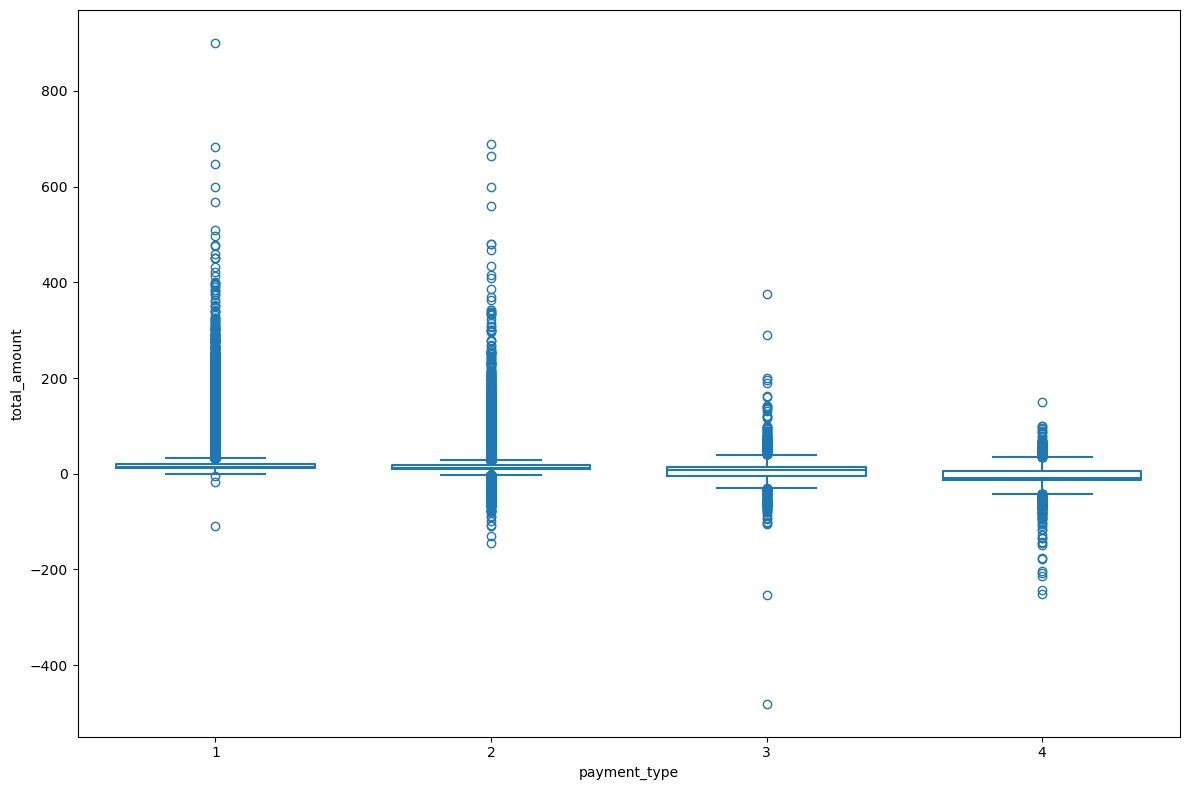

In [462]:
# boxplot
# A box plot, also known as a box-and-whisker plot, is a powerful visualization tool for displaying the distribution, variability, 
# and outliers within a numerical dataset
import matplotlib.pyplot as plt
import seaborn as sns
sampleData = taxiDataIgnoreNadf.sample(frac=0.7,random_state=1)
plt.figure(figsize=(12, 8))
sns.boxplot(data=sampleData, x="payment_type", y="total_amount", fill=False, gap=.1)
plt.tight_layout()
plt.show()

# need help in understanding the below plot

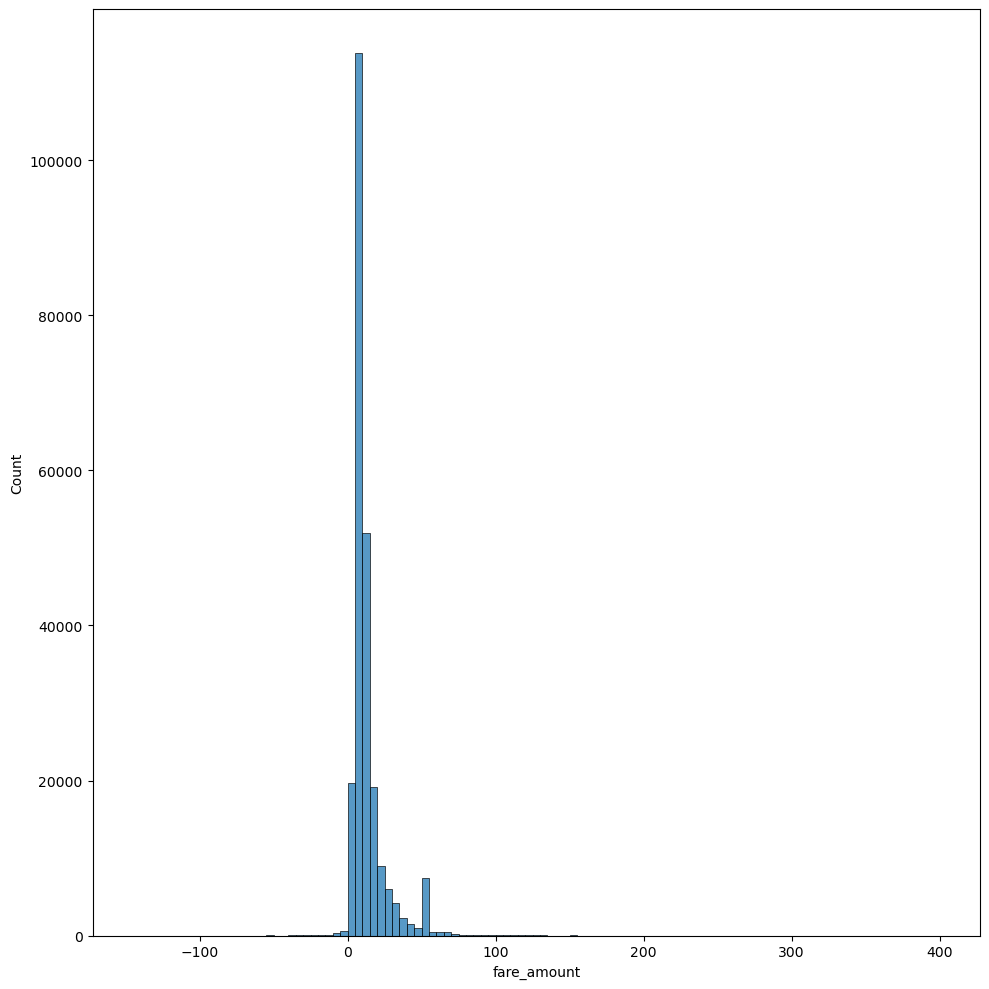

In [482]:
import matplotlib.pyplot as plt
import seaborn as sns

sampleData = taxiDataIgnoreNadf.sample(frac=0.1,random_state=1)

plt.figure(figsize=(10, 10))
sns.histplot(data=sampleData,x="fare_amount", binwidth=5)
plt.tight_layout()
plt.show()

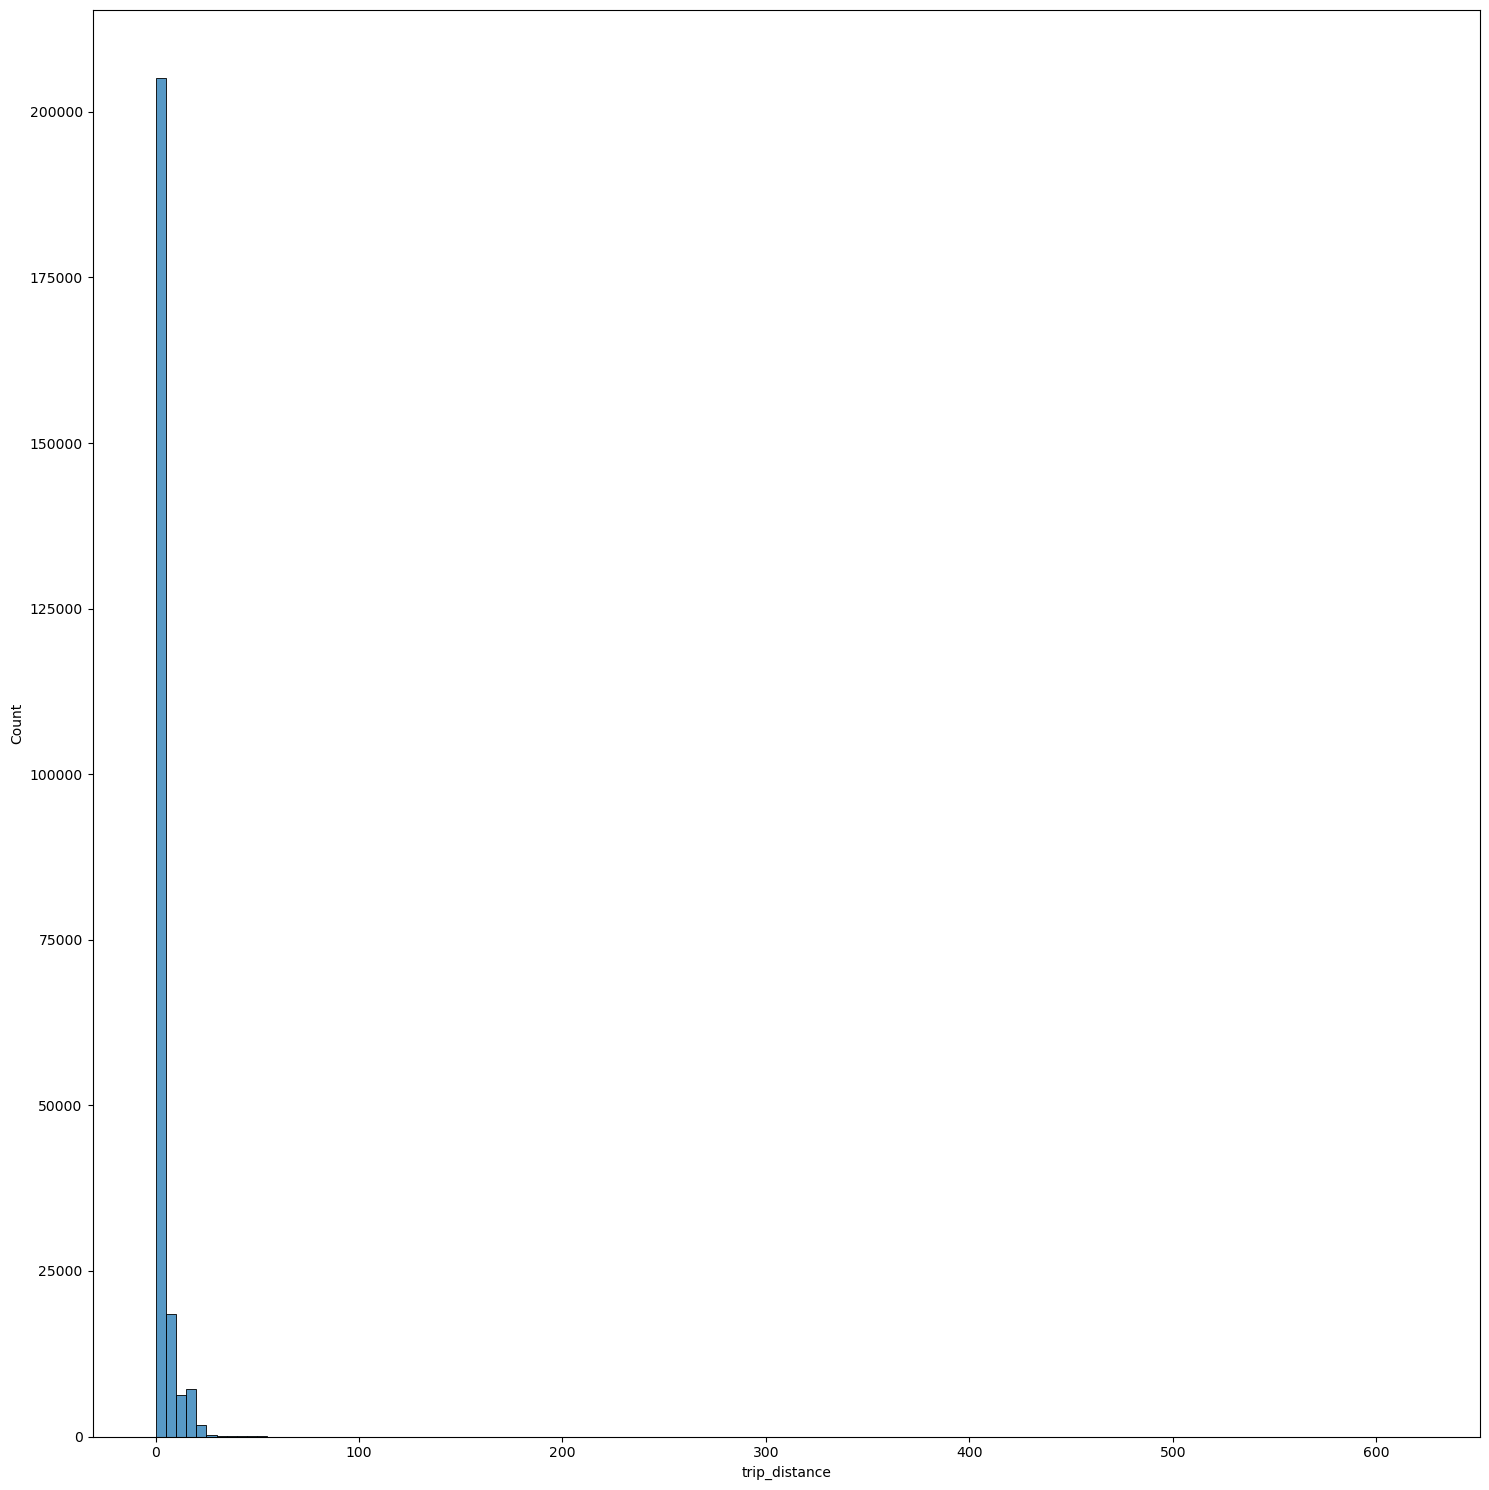

In [498]:
import matplotlib.pyplot as plt
import seaborn as sns

sampleData = taxiDataIgnoreNadf.sample(frac=0.1,random_state=1)

plt.figure(figsize=(15, 15))
sns.histplot(data=sampleData,x="trip_distance", binwidth=5)
plt.tight_layout()
plt.show()

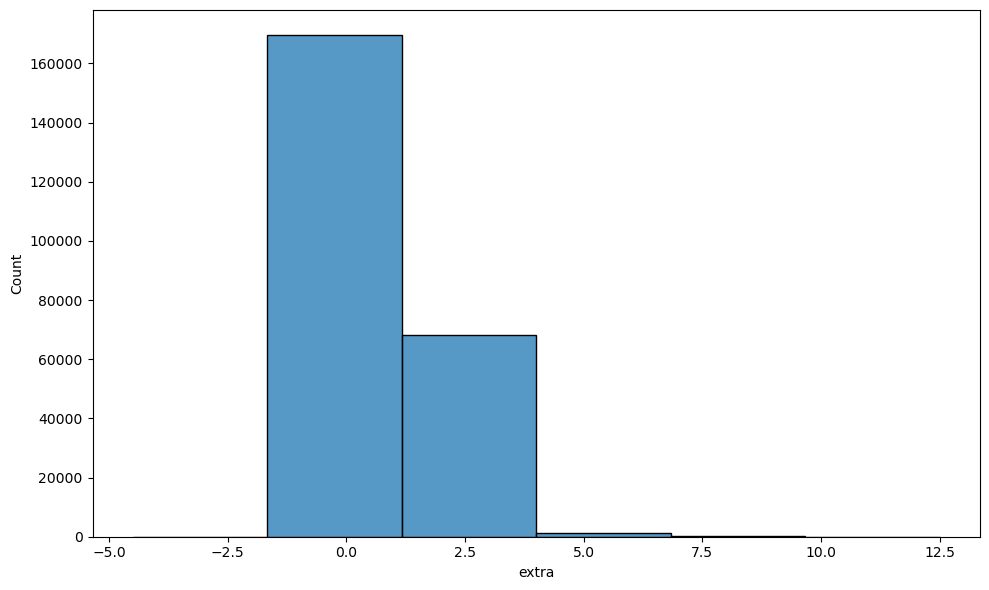

In [494]:
import matplotlib.pyplot as plt
import seaborn as sns

sampleData = taxiDataIgnoreNadf.sample(frac=0.1,random_state=1)

plt.figure(figsize=(10, 6))
sns.histplot(data=sampleData,x="extra", binwidth=3)
plt.tight_layout()
plt.show()

In [ ]:
# pandas, numpy, sci-kit learn, matplotlib, keras, sea-born